# Seperation vector machine (SVM) on Cupcakes vs Muffins

In [69]:
# packages to import
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib notebook

In [70]:
# read in data
recipes = pd.read_csv('Cupcakes vs Muffins.csv')
print(recipes.head())  # first 5 elements

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


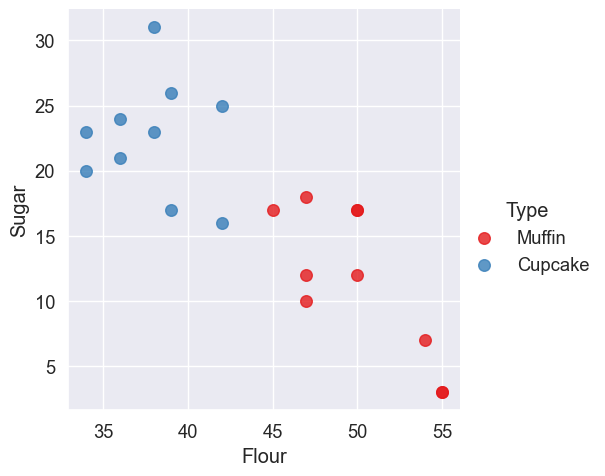

In [71]:
# plot some data
sns.lmplot(x = 'Flour', y = 'Sugar', data = recipes, 
           hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s": 70});

In [72]:
# pre-process data
type_label = np.where(recipes['Type']=='Muffin', 0, 1)
print(type_label)  # 0 - muffin and 1 for cupcake

recipe_features = recipes.columns.values[1:].tolist()
print(recipe_features)

ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [73]:
# fit svm model
model = svm.SVC(kernel = 'linear')  # support vector classifier
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [74]:
# get the seperating hyperplane
w = model.coef_[0]  # coefficients
a = -w[0] / w[1]  # slope
xx = np.linspace(30, 60)  # creates a space from 30 to 60
yy = a * xx + (-model.intercept_[0] / w[1])

# plot the model
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])

b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [75]:
print((-model.intercept_[0] / w[1]))

3.7306484861020344e+16


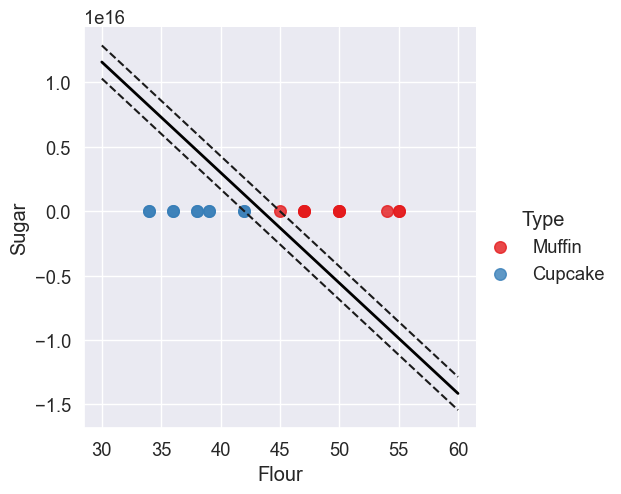

In [76]:
sns.lmplot(x = 'Flour', y = 'Sugar', data = recipes, 
           hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s": 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [10]:
# function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print('You are looking at a muffin recipe')
    else:
        print('You are looking at a cupcake recipe')
        
muffin_or_cupcake(50, 20)

You are looking at a muffin recipe


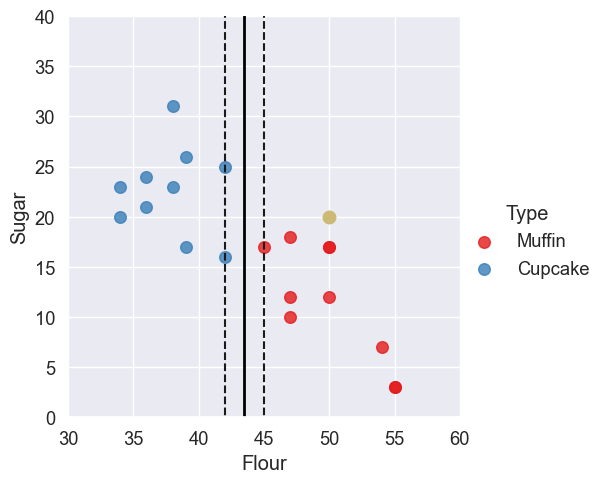

In [77]:
sns.lmplot(x = 'Flour', y = 'Sugar', data = recipes, 
           hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s": 70});
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.plot(50, 20, 'yo', markersize = 9)
plt.xlim(30, 60);
plt.ylim(0, 40);

In [78]:
muffin_or_cupcake(40, 20)

You are looking at a cupcake recipe


In [79]:
print(model.support_vectors_)

[[45. 17.]
 [42. 16.]
 [42. 25.]]


In [80]:
model.support_vectors_[:, 1]

array([17., 16., 25.])